# Phase Shifts and Cross Sections for All Partial Waves

In [1]:
import time
print time.asctime( time.localtime(time.time()) )

Wed May 06 18:22:01 2015


In [2]:
%pylab inline
from scipy.interpolate import interp1d
from scipy.special import eval_legendre
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandasql import sqldf
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

Populating the interactive namespace from numpy and matplotlib


In [3]:
#%run "../../Database Functions.py"
%run "../../Common.py"
pylab.rcParams.update(params)

Loading singlet phase shifts
Halfway through loading singlet phase shifts
Loading triplet phase shifts
Halfway through loading triplet phase shifts


../../Common.py:401: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sls == None:


In [4]:
def pysqldf(q):
    return sqldf(q, globals())

In [5]:
# Just a test to show how we can select the desired data
print pysqldf("SELECT * from dftidy WHERE L=0 AND IsTriplet=0")[:3]
print dftidy[((dftidy.L == 0) & (dftidy.IsTriplet == 0))][:3]

   L  IsTriplet   Kappa             E     Phase      Cross
0  0          0  0.0001  6.802846e-08 -0.000433  75.016451
1  0          0  0.0002  2.721139e-07 -0.000866  75.016435
2  0          0  0.0003  6.122562e-07 -0.001299  75.016400
   L IsTriplet   Kappa             E     Phase      Cross
0  0     False  0.0001  6.802846e-08 -0.000433  75.016451
1  0     False  0.0002  2.721139e-07 -0.000866  75.016435
2  0     False  0.0003  6.122562e-07 -0.001299  75.016400


In [6]:
0 == False  # The SQL version does not return True or False entries.

True

## Plotting Phase Shifts and Cross Sections

This section just has the phase shifts and cross sections plotted with respect to energy.

In [7]:
WaltersE = ktoE(np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]))
Walters1S = np.array([-0.428, -0.825, -1.167, -1.453, -1.685, -1.867, -1.992])
Walters3S = np.array([-0.206, -0.414, -0.624, -0.838, -1.037, -1.213, -1.367])
Walters1P = np.array([0.0221, 0.183, 0.580, 0.956, 1.106, 1.134, 1.133])
Walters3P = np.array([-0.000953, -0.0122, -0.0456, -0.104, -0.178, -0.247, -0.295])
Walters1D = np.array([2.02e-4, 3.49e-3, 1.73e-2, 5.22e-2, 1.16e-1, 2.08e-1, 3.24e-1])
Walters3D = np.array([8.48e-5, 1.15e-3, 2.84e-3, 2.37e-3, -4.66e-3, -1.85e-2, -3.27e-2])

ZhangE = ktoE(np.array([0.1, 0.2]))
Zhang1S = np.array([-0.42629, -0.81973])
Zhang3S = np.array([-0.21461, -0.43145])

If we need to make the triplet line not solid: http://stackoverflow.com/questions/14710221/python-matplotlib-dash-dot-dot-how-to

c:\Coding\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


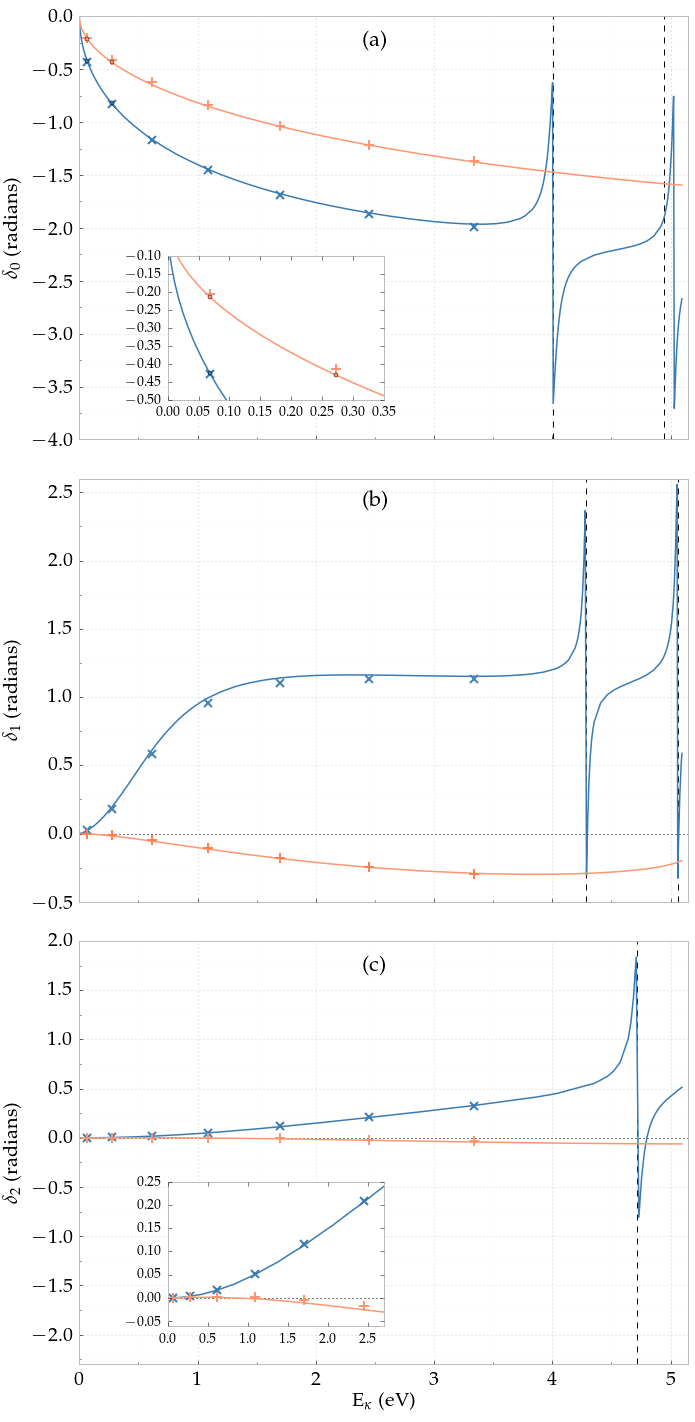

In [8]:
fig = pyplot.figure(figsize=(10, 6.7*3))

##########
# S-Wave #
##########
pyplot.subplot(3, 1, 1)
pyplot.axvline(x=4.0058, color='black', ls='dashed', lw=1)
pyplot.axvline(x=4.9479, color='black', ls='dashed', lw=1)
pyplot.plot(df['E'], df['Phase1S'], marker='.', markersize=0.01, label=r'$^1S$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase3S'], marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(WaltersE, Walters1S, 'x', markersize=8, mew=2, label=r'$^1S$ Close-coupling', color=singletcolor)
pyplot.plot(WaltersE, Walters3S, '+', markersize=10, mew=2, label=r'$^3S$ Close-coupling', color=tripletcolor)
pyplot.plot(ZhangE, Zhang1S, 'o', markersize=4, label=r'$^1S$ Confined variational', color=singletcolor)
pyplot.plot(ZhangE, Zhang3S, 'o', markersize=4, label=r'$^3S$ Confined variational', color=tripletcolor)
#pyplot.xlabel(r"$\rm{E}\: (eV)$")
ax = plt.gca()
ax.set_xticklabels([])
pyplot.ylabel(r"$\delta_0$ (radians)")
pyplot.xlim([0,5.15])
#pyplot.legend()
ax.text(2.4, -0.28, '(a)', fontsize=22)
FixPlot(plt)

p1S = np.array(df['Phase1S'].tolist())
p3S = np.array(df['Phase3S'].tolist())
ES = np.array(df['E'].tolist())

axins = inset_axes(ax, 3, 2, loc=9, bbox_to_anchor=(0.4, 0.82), bbox_transform=ax.figure.transFigure) # zoom = 6

pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.plot(ES, p1S, '-', marker='.', markersize=0.01, color=singletcolor, label='Singlet')
pyplot.plot(ES, p3S, '-', marker='.', markersize=0.01, color=tripletcolor, label='Triplet')
pyplot.plot(WaltersE, Walters1S, 'x', markersize=8, mew=2, color=singletcolor)
pyplot.plot(WaltersE, Walters3S, '+', markersize=10, mew=2, color=tripletcolor)
pyplot.plot(ZhangE, Zhang1S, 'o', markersize=4, label=r'$^1S$ Confined variational', color=singletcolor)
pyplot.plot(ZhangE, Zhang3S, 'o', markersize=4, label=r'$^3S$ Confined variational', color=tripletcolor)

axins.axis([0.0, 0.35, -0.5, -0.1])
pyplot.xticks(fontsize = 14) # work on current fig
pyplot.yticks(fontsize = 14) # work on current fig

##########
# P-Wave #
##########
pyplot.subplot(3, 1, 2)
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.axvline(x=4.2858, color='black', ls='dashed', lw=1)
pyplot.axvline(x=5.0585, color='black', ls='dashed', lw=1)
pyplot.plot(df['E'], df['Phase1P'], marker='.', markersize=0.01, label=r'$^1P$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase3P'], marker='.', markersize=0.01, label=r'$^3P$ Complex Kohn', color=tripletcolor)
pyplot.plot(WaltersE, Walters1P, 'x', markersize=8, mew=2, label=r'$^1P$ Close-coupling', color='steelblue')
pyplot.plot(WaltersE, Walters3P, '+', markersize=10, mew=2, label=r'$^3P$ Close-coupling', color='coral')
#pyplot.xlabel(r"$\rm{E}\: (eV)$")
ax = plt.gca()
ax.set_xticklabels([])
pyplot.ylabel(r"$\delta_1$ (radians)")
pyplot.xlim([0,5.15])
pyplot.ylim([-0.5,2.6])
#pyplot.legend()
ax.text(2.4, 2.4, '(b)', fontsize=22)
FixPlot(plt)

##########
# D-Wave #
##########
pyplot.subplot(3, 1, 3)
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.axvline(x=4.7192, color='black', ls='dashed', lw=1)
#df.plot(x='E', y='Phase1D', marker='.', markersize=0.01, label=r'$^1D$ Complex Kohn', color=singletcolor)
#df.plot(x='E', y='Phase3D', marker='.', markersize=0.01, label=r'$^3D$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase1D'], marker='.', markersize=0.01, label=r'$^1D$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase3D'], marker='.', markersize=0.01, label=r'$^3D$ Complex Kohn', color=tripletcolor)
pyplot.plot(WaltersE, Walters1D, 'x', markersize=8, mew=2, label=r'$^1D$ Close-coupling', color=singletcolor)
pyplot.plot(WaltersE, Walters3D, '+', markersize=10, mew=2, label=r'$^3D$ Close-coupling', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
ax = plt.gca()
pyplot.ylabel(r"$\delta_2$ (radians)")
pyplot.xlim([0, 5.15])
pyplot.ylim([-2.3, 2])
#pyplot.legend()
ax.text(2.4, 1.7, '(c)', fontsize=22)
FixPlot(plt)

p1D = np.array(df['Phase1D'].tolist())
p3D = np.array(df['Phase3D'].tolist())
ED = np.array(df['E'].tolist())

axins = inset_axes(ax, 3, 2, loc=9, bbox_to_anchor=(0.4, 0.18), bbox_transform=ax.figure.transFigure) # zoom = 6

pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
pyplot.plot(ED, p1D, '-', marker='.', markersize=0.01, color=singletcolor, label='Singlet')
pyplot.plot(ED, p3D, '-', marker='.', markersize=0.01, color=tripletcolor, label='Triplet')
pyplot.plot(WaltersE, Walters1D, 'x', markersize=8, mew=2, color=singletcolor)
pyplot.plot(WaltersE, Walters3D, '+', markersize=10, mew=2, color=tripletcolor)

axins.axis([0.0, 2.7, -0.06, 0.25])
pyplot.xticks(fontsize = 14) # work on current fig
pyplot.yticks(fontsize = 14) # work on current fig

plt.tight_layout()

pyplot.savefig("spd-wave-phases.pdf", bbox_inches='tight')
pyplot.show()

In [9]:
WaltersK = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
print Walters1D

[  2.02000000e-04   3.49000000e-03   1.73000000e-02   5.22000000e-02
   1.16000000e-01   2.08000000e-01   3.24000000e-01]


In [10]:
sub1D = GetSubset(kappa1D, WaltersK, phase1D)
sub3D = GetSubset(kappa3D, WaltersK, phase3D)

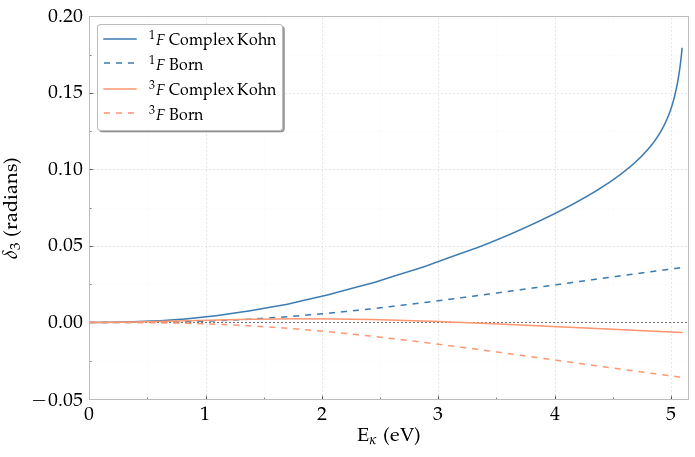

In [11]:
#fig = pyplot.figure(figsize=(10, 6.7*3))

# F-Wave
#pyplot.subplot(3, 1, 1)
pyplot.axhline(y=0, color='black', ls='dotted', lw=1)
#df.plot(x='E', y='Phase1F', marker='.', markersize=0.01, label='$^1F$ Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Phase1F'], marker='.', markersize=0.01, label='$^1F$ Complex Kohn', color=singletcolor)
pyplot.plot(E1F, sls1F, '--', marker='o', markersize=0.01, label='$^1F$ Born', color=singletcolor)
#df.plot(x='E', y='Phase3F', marker='.', markersize=0.01, label='$^3F$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Phase3F'], marker='.', markersize=0.01, label='$^3F$ Complex Kohn', color=tripletcolor)
pyplot.plot(E3F, sls3F, '--', marker='o', markersize=0.01, label='$^3F$ Born', color=tripletcolor)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
#ax = plt.gca()
#ax.set_xticklabels([])
#ax.text(2.4, 0.18, '(a)', fontsize=22)
pyplot.ylabel(r"$\delta_3$ (radians)")
pyplot.xlim([0,5.15])
pyplot.legend()
FixPlot(plt)

plt.tight_layout()

pyplot.savefig("fwave-phases.pdf", bbox_inches='tight')
pyplot.show()

## Creating Interpolated Functions and Plotting

The partial waves all have phase shifts and cross sections calculated for different $\kappa$. For us to calculate the total cross sections, we can choose a set of points that all three share in common, but this would drastically reduce the points, especially near the resonances. So we use Python's interp1d linear interpolation function to create a function for the 6 curves, then create lists with these functions stored in the interp_plotc lists. The total cross section plot is then found by summing these 6 lists.

In [12]:
#df['Cross1'] = 0.25*(df['Cross1S'] + df['Cross1P'] + df['Cross1D'] + df['Cross1F'] + df['Cross1G'] + df['Cross1H'])
#df['Cross3'] = 0.75*(df['Cross3S'] + df['Cross3P'] + df['Cross3D'] + df['Cross3F'] + df['Cross3G'] + df['Cross3H'])
#df['Cross'] = df['Cross1'] + df['Cross3']

For the total cross section, including both the singlet and the triplet states, the singlet contributes $\frac{1}{4}$, and the triplet contributes $\frac{3}{4}$. **Note:** Where did I find this information? Maybe look at notes from when Dr. Robicheaux met with us.

#### Read in Walters Data

In [13]:
datanp = numpy.loadtxt('Walters Cross Section.csv', dtype=float, delimiter=',')
datanpt = np.transpose(datanp)

#### Plot Cross Sections

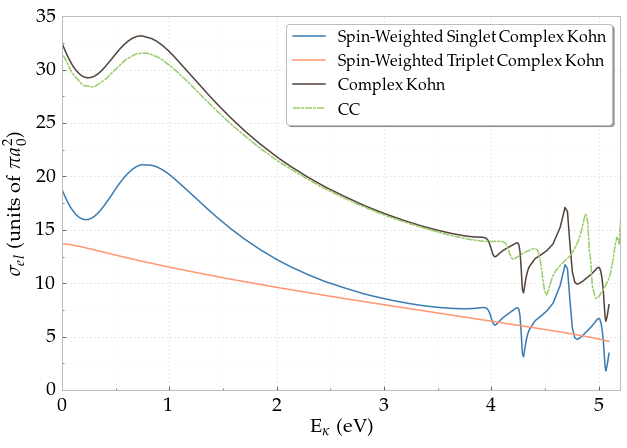

In [14]:
#df.plot(x='E', y='Cross1', marker='.', markersize=0.01, label='Spin-Weighted Singlet Complex Kohn', color=singletcolor)
#df.plot(x='E', y='Cross3', marker='.', markersize=0.01, label='Spin-Weighted Triplet Complex Kohn', color=tripletcolor)
#df.plot(x='E', y='Cross', marker='.', markersize=0.01, label='Complex Kohn', color=combinedcolor)
pyplot.plot(df['E'], df['Cross1'], marker='.', markersize=0.01, label='Spin-Weighted Singlet Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Cross3'], marker='.', markersize=0.01, label='Spin-Weighted Triplet Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Cross'], marker='.', markersize=0.01, label='Complex Kohn', color=combinedcolor)
line, = pyplot.plot(datanpt[0], datanpt[1], label='CC', color='#99CC66')  #, ls = 'dashed'
line.set_dashes([7, 1, 3, 1])  # 7 points on, 1 point off, 3 points on, 1 point off
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma_{el}$ (units of $\pi a_0^2$)")
pyplot.legend(loc='upper right', shadow=True)
pyplot.xlim([0,5.2])
FixPlot(plt)
pyplot.savefig("combined-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

In [15]:
# Percent difference between max CC and complex Kohn cross sections
print df['Cross'].max()
print df['Cross'][53]
print datanpt[1].max()
print datanpt[0][datanpt[1].argmax()]
print
print PercentDiff(df['Cross'].max(), datanpt[1].max())

33.1648758978
33.1648758978
31.5327
0.735294

5.04555503083


In [16]:
# Minimum in dip
print df['Cross'][39]
print datanpt[1][39]
print PercentDiff(df['Cross'][39], datanpt[1][39])

29.2288624437
28.3668
2.99349779872


In [17]:
print np.size(datanpt[0])
print datanpt[0][408]
print df['E'].shape
print df['E'][76]
print
print PercentDiff(datanpt[1][408], df['Cross'][76])

915
3.00735
(191L,)
3.00838868843

0.920467637565


In [18]:
print np.size(datanpt[0])
print datanpt[0][14]
print df['E'].shape
print df['E'][33]
print
print PercentDiff(datanpt[1][14], df['Cross'][33])

915
0.110294
(191L,)
0.114968101836

2.18187273657


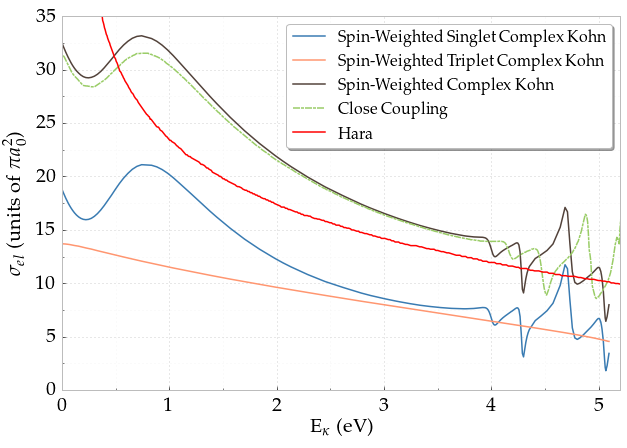

In [19]:
datanph = numpy.loadtxt('Hara - Total CS.csv', dtype=float, delimiter=',')
datanpth = np.transpose(datanph)

#df.plot(x='E', y='Cross1', marker='.', markersize=0.01, label='Spin-Weighted Singlet Complex Kohn', color=singletcolor)
#df.plot(x='E', y='Cross3', marker='.', markersize=0.01, label='Spin-Weighted Triplet Complex Kohn', color=tripletcolor)
#df.plot(x='E', y='Cross', marker='.', markersize=0.01, label='Spin-Weighted Complex Kohn', color=combinedcolor)
pyplot.plot(df['E'], df['Cross1'], marker='.', markersize=0.01, label='Spin-Weighted Singlet Complex Kohn', color=singletcolor)
pyplot.plot(df['E'], df['Cross3'], marker='.', markersize=0.01, label='Spin-Weighted Triplet Complex Kohn', color=tripletcolor)
pyplot.plot(df['E'], df['Cross'], marker='.', markersize=0.01, label='Spin-Weighted Complex Kohn', color=combinedcolor)
line, = pyplot.plot(datanpt[0], datanpt[1], label='Close Coupling', color='#99CC66')  #, ls = 'dashed'
line.set_dashes([7, 1, 3, 1])  # 7 points on, 1 point off, 3 points on, 1 point off
line, = pyplot.plot(ktoE(datanpth[0]), datanpth[1]/pi, label='Hara', color='red')  #, ls = 'dashed'
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma_{el}$ (units of $\pi a_0^2$)")
pyplot.legend(loc='upper right', shadow=True)
pyplot.xlim([0,5.2])
pyplot.ylim([0,35])
FixPlot(plt)
pyplot.savefig("hara-combined-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

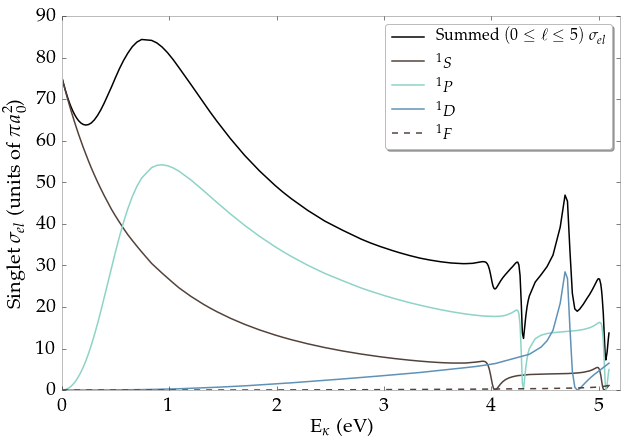

In [20]:
colors = ('#52423A', "#8dd3c7", '#5F91B7')
pyplot.plot(df['E'], 4*df['Cross1'], marker='.', markersize=0.01, label=r'Summed $(0 \leq \ell \leq 5)$ \sigma_{el}', color='black')
#df.plot(x='E', y='Cross1S', marker='.', markersize=0.01, label=r'$^1S$', color=colors[0])
#df.plot(x='E', y='Cross1P', marker='.', markersize=0.01, label=r'$^1P$', color=colors[1])
#df.plot(x='E', y='Cross1D', marker='.', markersize=0.01, label=r'$^1D$', color=colors[2])
#df.plot(x='E', y='Cross1F', marker='.', markersize=0.01, label=r'$^1F$', color=colors[0], ls='dashed')
pyplot.plot(df['E'], df['Cross1S'], marker='.', markersize=0.01, label=r'$^1S$', color=colors[0])
pyplot.plot(df['E'], df['Cross1P'], marker='.', markersize=0.01, label=r'$^1P$', color=colors[1])
pyplot.plot(df['E'], df['Cross1D'], marker='.', markersize=0.01, label=r'$^1D$', color=colors[2])
pyplot.plot(df['E'], df['Cross1F'], marker='.', markersize=0.01, label=r'$^1F$', color=colors[0], ls='dashed')
pyplot.legend(loc='upper right', shadow=True)
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"Singlet $\sigma_{el}$ (units of $\pi a_0^2$)")
pyplot.xlim([0,5.2])
pyplot.savefig("singlet-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

#### Find Minimum and Maximum for 'Dip' Feature

In [21]:
print "Minimum: ", df['E'][df[df.E < 1.0]['Cross'].idxmin()]
print "Maximum: ", df['E'][df[df.E < 1.0]['Cross'].idxmax()]
#phase1D1[kappa1D1<0.3]

Minimum:  0.245582750076
Maximum:  0.740829957986


## Differential Cross Sections

From page 584 of Bransden and Joachain - equation (12.63)

In [22]:
def DifferentialCrossSingle(kappa, theta, kappalist, lmax, interp_phase):
    """ The differential cross sections for a given value of kappa also depend on theta.
        This function returns a value with respect to kappa for a given theta. """
    #@TODO: Make this general for both the singlet and the triplet.

    phases = []
    for l in range(lmax+1):
        phases = np.append(phases, GetSubset(kappalist, [kappa], interp_phase[l]))
    #print phases
    
    diff_cross1 = 0.0
    for l in range(lmax+1):
        for lp in range(lmax+1):
            diff_cross1 = diff_cross1 + 1/kappa**2 * (2*l+1) * (2*lp+1) * np.cos(phases[l]-phases[lp]) * np.sin(phases[l]) * np.sin(phases[lp]) * eval_legendre(l, np.cos(theta)) * eval_legendre(lp, np.cos(theta))
            
    return diff_cross1

In [23]:
# Singlet
interp_phasec1S = np.array(df['Phase1S'].tolist())
interp_phasec1P = np.array(df['Phase1P'].tolist())
interp_phasec1D = np.array(df['Phase1D'].tolist())
interp_phasec1F = np.array(df['Phase1F'].tolist())
interp_phasec1G = np.array(df['Phase1G'].tolist())
interp_phasec1H = np.array(df['Phase1H'].tolist())
interp_phase1 = [interp_phasec1S, interp_phasec1P, interp_phasec1D, interp_phasec1F, interp_phasec1G, interp_phasec1H]
# Triplet
interp_phasec3S = np.array(df['Phase3S'].tolist())
interp_phasec3P = np.array(df['Phase3P'].tolist())
interp_phasec3D = np.array(df['Phase3D'].tolist())
interp_phasec3F = np.array(df['Phase3F'].tolist())
interp_phasec3G = np.array(df['Phase3G'].tolist())
interp_phasec3H = np.array(df['Phase3H'].tolist())
interp_phase3 = [interp_phasec3S, interp_phasec3P, interp_phasec3D, interp_phasec3F, interp_phasec3G, interp_phasec3H]
# Energy and momentum values used
kappasub = np.array(df['Kappa'].tolist())
Esub = np.array(df['E'].tolist())
minK = df['Kappa'].min()
maxK = df['Kappa'].max()

#### Singlet + Triplet

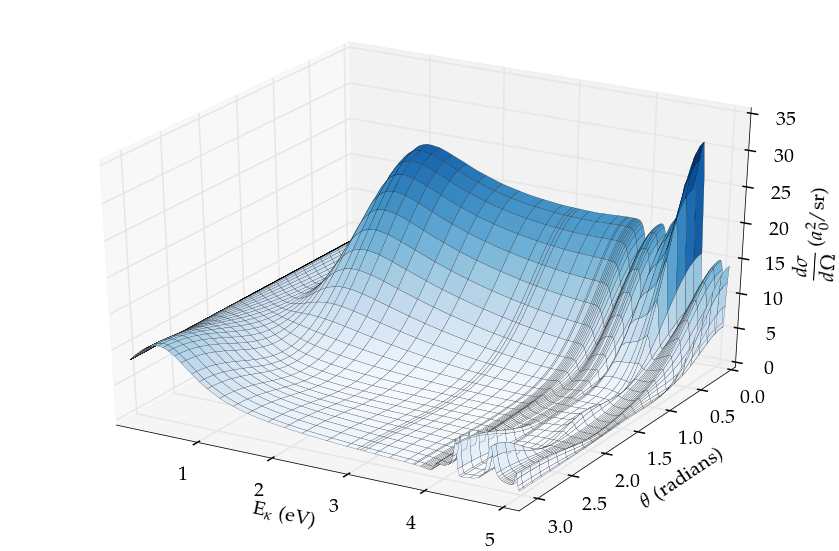

In [24]:
Ntheta = 50
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = 0.25*zs1 + 0.75*zs3
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("combined-diff-cross-sections.pdf", bbox_inches='tight')

plt.show()

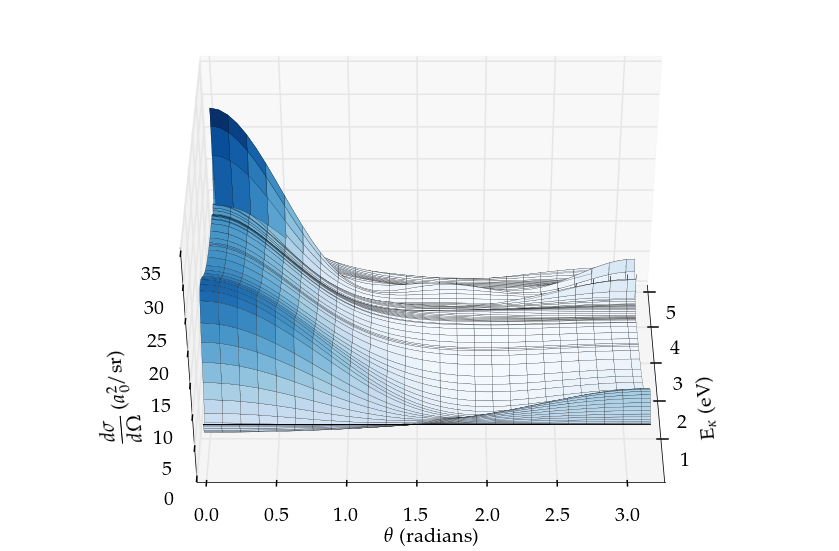

In [25]:
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
# Already calculated these two above
#zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = 0.25*zs1 + 0.75*zs3
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)
ax.view_init(elev=40, azim=180)
#ax.view_init(elev=40, azim=110)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20, rotation=95)
ax.xaxis.set_rotate_label(False)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20, rotation=95)

plt.tight_layout()
plt.savefig("combined-diff-cross-sections-1.pdf", bbox_inches='tight')

plt.show()

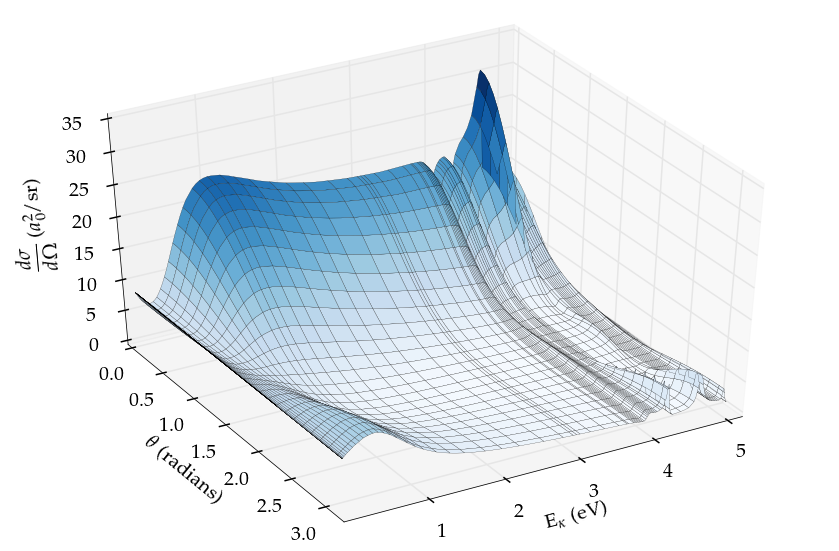

In [26]:
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)
# Already calculated these two above
#zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
#zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),lmax,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = 0.25*zs1 + 0.75*zs3
Z = zs.reshape(X.shape)

#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.1, antialiased=True, cmap=cm.Blues)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)
#ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.gray)
#ax.plot_surface(X, Y, Z, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(0, 3.2)
ax.set_ylim3d(3.2, 0)
ax.view_init(elev=40, azim=240)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=20, rotation=95)
#ax.xaxis.set_rotate_label(False)
ax.set_xlabel(r'${\rm{E}}_\kappa$ (eV)', fontsize=20, labelpad=20, rotation=95)

plt.tight_layout()
plt.savefig("combined-diff-cross-sections-2.pdf", bbox_inches='tight')

plt.show()

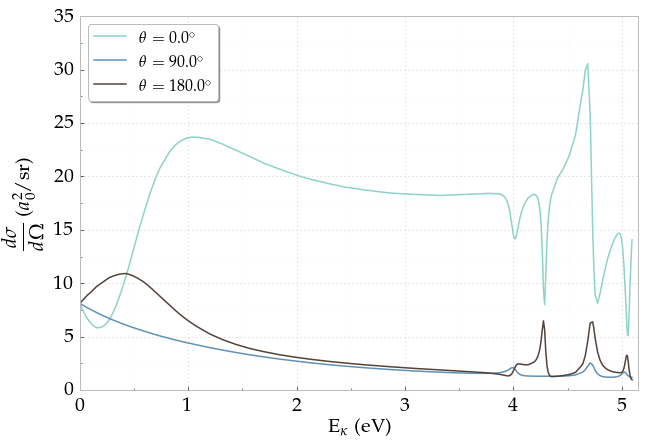

In [27]:
theta = (0, pi/2, pi)
#plotcol = ('steelblue', '#99CC66', 'coral')
#plotcol = ("#8dd3c7", "#377eb8", "#52423A")
plotcol = ("#8dd3c7", '#5F91B7', "#52423A")
plotsty = ('-', '-', ':')

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)")

for j, t in enumerate(theta):
    diff_cross = []
    for i in range(np.size(kappasub)):
        k = kappasub[i]
        d1 = DifferentialCrossSingle(k, t, kappasub, lmax, interp_phase1)
        d3 = DifferentialCrossSingle(k, t, kappasub, lmax, interp_phase3)
        diff_cross = np.append(diff_cross, 0.25*d1 + 0.75*d3)
    kappalabel = r'$\theta = ' + str(t*180/pi) + r'^{\circ}$'
    #pyplot.plot(ktoE(kappasub), diff_cross, plotsty[j], marker='.', markersize=0.01, label=kappalabel, color=plotcol[j])
    line, = pyplot.plot(ktoE(kappasub), diff_cross, marker='.', markersize=0.01, label=kappalabel, color=plotcol[j])
    #if j == 2:
    #    line.set_dashes([12, 2, 4, 2]) 

pyplot.legend()
pyplot.xlim([0,5.15])
FixPlot(plt)
#pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=22)
pyplot.savefig("diff-cross-section-2D-theta-f.pdf", bbox_inches='tight')
pyplot.show()

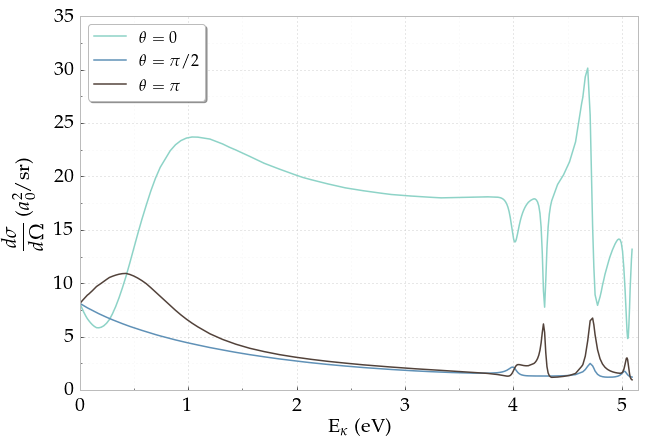

In [31]:
theta = (0, pi/2, pi)
thetalabel = (r'$0$', r'$\pi/2$', r'$\pi$')
#plotcol = ('steelblue', '#99CC66', 'coral')
#plotcol = ("#8dd3c7", "#377eb8", "#52423A")
plotcol = ("#8dd3c7", '#5F91B7', "#52423A")
plotsty = ('-', '-', ':')

lmax = 3  # Through the F-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)")

for j, t in enumerate(theta):
    diff_cross = []
    for i in range(np.size(kappasub)):
        k = kappasub[i]
        d1 = DifferentialCrossSingle(k, t, kappasub, lmax, interp_phase1)
        d3 = DifferentialCrossSingle(k, t, kappasub, lmax, interp_phase3)
        diff_cross = np.append(diff_cross, 0.25*d1 + 0.75*d3)
    #kappalabel = r'$\theta = ' + str(t*180/pi) + r'^{\circ}$'
    kappalabel = r'$\theta = \;$' + thetalabel[j]
    line, = pyplot.plot(ktoE(kappasub), diff_cross, marker='.', markersize=0.01, label=kappalabel, color=plotcol[j])
    #if j == 2:
    #    line.set_dashes([12, 2, 4, 2]) 

pyplot.legend()
pyplot.xlim([0,5.15])
FixPlot(plt)
#pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$ ($a_0^2/$sr)", fontsize=22)
pyplot.savefig("diff-cross-section-2D-theta.pdf", bbox_inches='tight')
pyplot.show()

In [32]:
print Etok(0.05)
print Etok(0.1)
print Etok(0.2)
print Etok(0.3)
print Etok(0.4)
print Etok(0.5)
print Etok(0.6)
print Etok(0.7)
print
print ktoE(0.27)

0.0857313522474
0.121242441069
0.171462704495
0.209998067965
0.242484882138
0.271106339988
0.296982115788
0.320777347415

0.495927492536


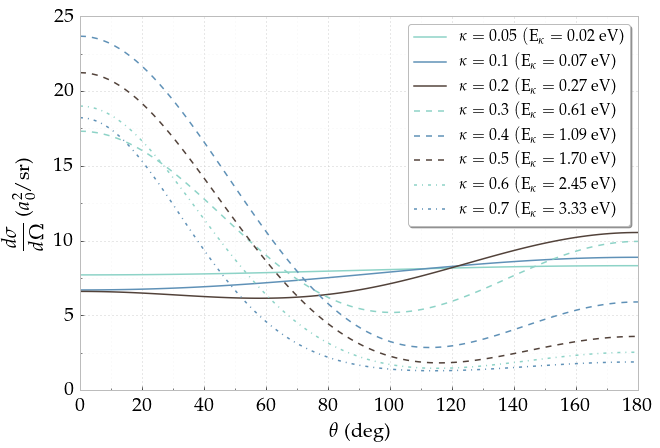

In [33]:
#ki = (0.05, 0.1, 0.15, 0.2, 0.25, 0.26, 0.27, 0.28, 0.3, 0.4, 0.5, 0.6, 0.7)
ki = (0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7)
colors = ('#52423A', "#8dd3c7", '#5F91B7')

lmax = 5  # Through the H-wave
Ntheta = 100
theta = np.linspace(0, pi, Ntheta)
#theta = np.array((1.0, 1.1))
#Ntheta = np.size(theta)

#pyplot.figure(1, figsize=(12,10))

#pyplot.title(r"$^1S$ versus E for $\theta = $" + str(theta))
pyplot.xlabel(r"$\theta$ (deg)")
pyplot.ylabel(r"$\displaystyle \frac{d\sigma}{d\Omega}$  ($a_0^2/$sr)")
#pyplot.legend(prop={'size':6})

idx = 0
for k in ki:
    diff_cross = []
    for i in range(Ntheta):
        d1 = DifferentialCrossSingle(k, theta[i], kappasub, lmax, interp_phase1)
        d3 = DifferentialCrossSingle(k, theta[i], kappasub, lmax, interp_phase3)
        diff_cross = np.append(diff_cross, 0.25*d1 + 0.75*d3)
        #diff_cross = np.append(diff_cross, d3)
    #kappalabel = r'$\kappa = ' + str(k) + r' / E = ' + "{0:.2f}".format(ktoE(k)) + r'$ eV'
    kappalabel = r'$\kappa = ' + str(k) + r'\; ({\rm{E}}_{\kappa} = ' + "{0:.2f}".format(ktoE(k)) + r'$ eV)'
    #${\rm{E}}_{\kappa}$
    #kappalabel = r'$\kappa = ' + str(k) + r'$'
    if idx < 3:
        lsty = 'solid'
    elif idx < 6:
        lsty = 'dashed'
    else:
        lsty = '-.'
    idx += 1
    #pyplot.plot(theta*180/pi, diff_cross, marker='.', markersize=0.01, label=kappalabel, ls=lsty, color=colors[idx%3])
    pyplot.plot(theta*180/pi, diff_cross, label=kappalabel, ls=lsty, color=colors[idx%3])
    #print diff_cross[0]

#pyplot.legend(loc='upper right', shadow=True, prop={'size':14})
pyplot.legend()
FixPlot(plt)
#pyplot.xlim([0, 3.2])
pyplot.savefig("diff-cross-section-2D-kappa.pdf", bbox_inches='tight')
pyplot.show()

## Momentum Transfer Cross Sections

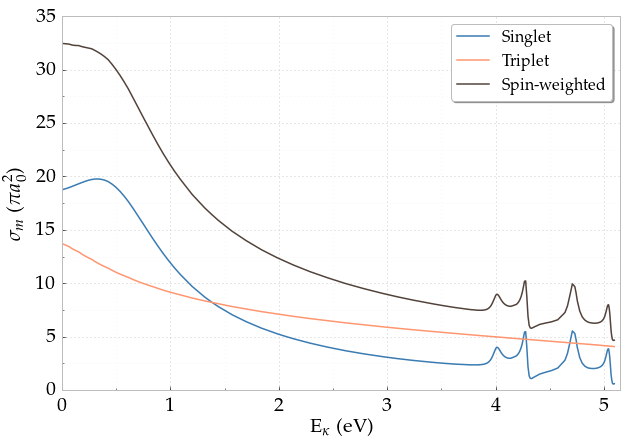

In [34]:
plotcol = (singletcolor, tripletcolor, '#52423A')
plotsty = ('-', '-', ':')

lmax = 5  # Through the H-wave

pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma_m$ ($\pi a_0^2$)")

mom_cross1 = []
mom_cross3 = []
mom_cross = []
for i in range(np.size(kappasub)):
    k = kappasub[i]
    m1 = 0
    m3 = 0
    for l in range(lmax):
        m1 += 4 / k**2 * (l+1) * (sin(interp_phase1[l][i] - interp_phase1[l+1][i]))**2
        m3 += 4 / k**2 * (l+1) * (sin(interp_phase3[l][i] - interp_phase3[l+1][i]))**2
    mom_cross1 = np.append(mom_cross1, 0.25*m1)
    mom_cross3 = np.append(mom_cross3, 0.75*m3)
    mom_cross = np.append(mom_cross, 0.25*m1 + 0.75*m3)
pyplot.plot(ktoE(kappasub), mom_cross1, plotsty[0], marker='.', markersize=0.01, label=r"Singlet", color=plotcol[0])
pyplot.plot(ktoE(kappasub), mom_cross3, plotsty[1], marker='.', markersize=0.01, label=r"Triplet", color=plotcol[1])
pyplot.plot(ktoE(kappasub), mom_cross, plotsty[1], marker='.', markersize=0.01, label=r"Spin-weighted", color=plotcol[2])

pyplot.legend()
pyplot.xlim([0,5.15])
FixPlot(plt)
pyplot.savefig("momentum-cross-sections.pdf", bbox_inches='tight')
pyplot.show()

The momentum transfer cross section should be the same as the total cross section for 0 energy

In [35]:
df['Cross'][0:5], mom_cross[0:5], kappasub[0:5], df['E'][0:5]

(0    32.448096
 1    32.448088
 2    32.448083
 3    32.448072
 4    32.448057
 Name: Cross, dtype: float64,
 array([ 32.44867475,  32.44866725,  32.44866181,  32.44865266,  32.4486379 ]),
 array([ 0.0001,  0.0002,  0.0003,  0.0004,  0.0005]),
 0    6.802846e-08
 1    2.721139e-07
 2    6.122562e-07
 3    1.088455e-06
 4    1.700712e-06
 Name: E, dtype: float64)

In [36]:
# Scattering length for S-wave
a01 = 4.331
a03 = 2.137

print 4 * a01**2
print (mom_cross1*4)[0]
print
print 4 * a03**2
print (mom_cross3*4/3)[0]

75.030244
75.0194357317

18.267076
18.2584210932


## All Cross Sections

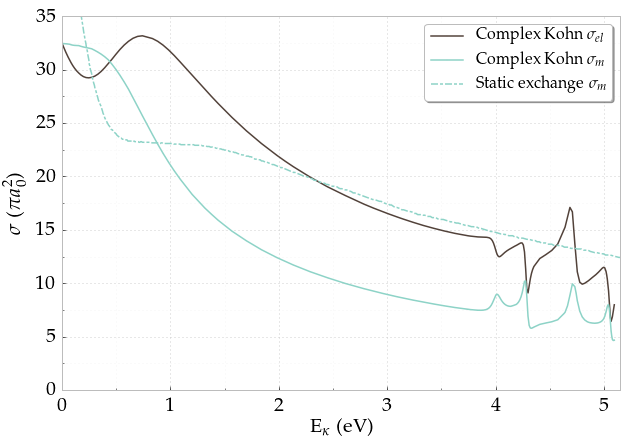

In [37]:
datanpbc = numpy.loadtxt('Blackwood Ortho-Para.csv', dtype=float, delimiter=',')
datanptbc = np.transpose(datanpbc)
datanphc = numpy.loadtxt('Hara - Conversion CS.csv', dtype=float, delimiter=',')
datanpthc = np.transpose(datanphc)

colors = ('#52423A', "#8dd3c7", '#5F91B7')

pyplot.plot(df['E'], df['Cross'], marker='.', markersize=0.01, label=r'Complex Kohn $\sigma_{el}$', color=colors[0])
#pyplot.plot(ktoE(kappasub), op_cross, '-', marker='.', markersize=0.01, label=r'Complex Kohn $\sigma_{c}$', color=colors[2])
pyplot.plot(ktoE(kappasub), mom_cross, plotsty[1], marker='.', markersize=0.01, label=r'Complex Kohn $\sigma_{m}$', color=colors[1])

#line, = pyplot.plot(datanptbc[0], datanptbc[1], label=r'CC $\sigma_{c}$', color=colors[2])  #, ls = 'dashed'
#line.set_dashes([7, 2, 3, 2])  # 7 points on, 1 point off, 3 points on, 1 point off
line, = pyplot.plot(ktoE(datanpthc[0]), datanpthc[1]/pi, label=r'Static exchange $\sigma_{m}$', color=colors[1])  #, ls = 'dashed'
line.set_dashes([7, 2, 3, 2])  # 7 points on, 1 point off, 3 points on, 1 point off
pyplot.xlabel(r"${\rm{E}}_{\kappa}$ (eV)")
pyplot.ylabel(r"$\sigma$ ($\pi a_0^2$)")

pyplot.legend()
pyplot.xlim([0,5.15])
pyplot.ylim([0,35])
FixPlot(plt)
pyplot.savefig("cross-section-comparisons.pdf", bbox_inches='tight')
pyplot.show()

## Effective Range

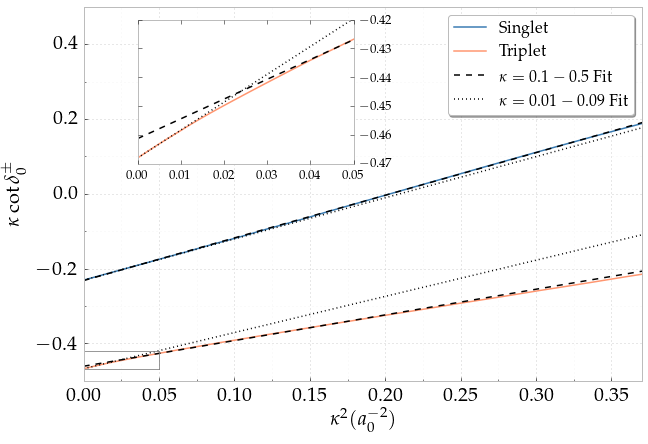

In [38]:
fig, ax = pyplot.subplots()
ERT1S = np.array(df['Phase1S'].tolist())
ERT3S = np.array(df['Phase3S'].tolist())
ERTkappa = np.array(df['Kappa'].tolist())
#df.plot(x='Kappa', y='Phase1S', marker='.', markersize=0.01, label=r'$^1S$ Complex Kohn', color=singletcolor)
#df.plot(x='Kappa', y='Phase3S', marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)

pyplot.xlabel(r"$\kappa^2 (a_0^{-2})$")
pyplot.ylabel(r"$\kappa \cot\delta_0^\pm$")

#pyplot.plot(E3G, sls3G, '--', marker='o', markersize=0.01, label='$^3G$ Born', color=tripletcolor)

pyplot.plot(ERTkappa**2, ERTkappa/np.tan(ERT1S), '-', color=singletcolor, label='Singlet')
pyplot.plot(ERTkappa**2, ERTkappa/np.tan(ERT3S), '-', color=tripletcolor, label='Triplet')

#pyplot.plot(ERTkappa**2, -0.232334 + 1.13842 * ERTkappa**2, '--', color='black', label=r'$\kappa = 0.2 - 0.4$ Fit')
#pyplot.plot(ERTkappa**2, -0.231008 + 1.10231 * ERTkappa**2, ':', color='black', label=r'$\kappa = 0.01 - 0.09$ Fit')

#pyplot.plot(ERTkappa**2, -0.461109 + 0.688617 * ERTkappa**2, '--', color='black')
#pyplot.plot(ERTkappa**2, -0.467929 + 0.965453 * ERTkappa**2, ':', color='black')

# -0.231845 = -1/a, and 1.13725 = 0.5 * r0 from the fittings
pyplot.plot(ERTkappa**2, -0.232127 + 1.14078 * ERTkappa**2, '--', color='black', label=r'$\kappa = 0.1 - 0.5$ Fit')
pyplot.plot(ERTkappa**2, -0.230917 + 1.10058 * ERTkappa**2, ':', color='black', label=r'$\kappa = 0.01 - 0.09$ Fit')

pyplot.plot(ERTkappa**2, -0.461295 + 0.686426 * ERTkappa**2, '--', color='black')
pyplot.plot(ERTkappa**2, -0.468005 + 0.967702 * ERTkappa**2, ':', color='black')


pyplot.xlim([0,0.37])
pyplot.ylim([-0.5,0.5])

pyplot.legend()
FixPlot(plt)

#axins = zoomed_inset_axes(ax, 3, loc=9) # zoom = 6
#axins = inset_axes(ax, 2.2, 1.8, loc=9, bbox_to_anchor=(0.2, 0.55), bbox_transform=ax.figure.transFigure) # zoom = 6
axins = inset_axes(ax, 3, 2, loc=9, bbox_to_anchor=(0.35, 0.89), bbox_transform=ax.figure.transFigure) # zoom = 6
axins.axis([0.0, 0.05, -0.47, -0.42])
pyplot.plot(ERTkappa**2, ERTkappa/np.tan(ERT3S), '-', color=tripletcolor, label='Triplet')

pyplot.plot(ERTkappa**2, -0.461295 + 0.686426 * ERTkappa**2, '--', color='black', label='Triplet')
pyplot.plot(ERTkappa**2, -0.468005 + 0.967702 * ERTkappa**2, ':', color='black', label='Triplet')

#######mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.9")
#plt.xticks(visible=False)
#plt.yticks(visible=False)
#matplotlib.rc('xtick', labelsize=18) 
#matplotlib.rc('ytick', labelsize=18) 
axins.yaxis.tick_right()
axins.yaxis.set_ticks_position('both')
plt.xticks(fontsize = 13) # work on current fig
plt.yticks(fontsize = 13) # work on current fig

#plt.plot([0, 0], [0, 1], 'k-')
l1 = Line2D([0,0.05],[-0.47,-0.47],lw=0.8,color='gray')
l2 = Line2D([0.05,0.05],[-0.47,-0.42],lw=0.8,color='gray')
l3 = Line2D([0,0.05],[-0.42,-0.42],lw=0.8,color='gray')
ax.add_line(l1)
ax.add_line(l2)
ax.add_line(l3)

pyplot.savefig("swave-ERT-short.pdf", bbox_inches='tight')
pyplot.draw()
pyplot.show()

## Plotly Plots

import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

import plotly.plotly as py
from plotly.graph_objs import *

dataE = df['E'].tolist()
data1S = df['Phase1S'].tolist()
data3S = df['Phase3S'].tolist()
datascatter1S = Scatter(x=dataE, y=data1S, name=r'$^1S \text{ Complex Kohn}$', mode='lines',
                        marker=Marker(color=singletcolor))
datascatter3S = Scatter(x=dataE, y=data3S, name=r'$^3S \text{ Complex Kohn}$', mode='lines',
                        marker=Marker(color=tripletcolor))
datascatter1SW = Scatter(x=WaltersE, y=Walters1S, name=r'$^1S \text{ Close-coupling}$', mode='markers',
                        marker=Marker(color=singletcolor, symbol='cross'))
datascatter3SW = Scatter(x=WaltersE, y=Walters3S, name=r'$^3S \text{ Close-coupling}$', mode='markers',
                        marker=Marker(color=tripletcolor, symbol='cross'))
datascatter1SZ = Scatter(x=ZhangE, y=Zhang1S, name=r'$^1S \text{ Confined variational}$', mode='markers',
                        marker=Marker(color='black', symbol='circle'))
datascatter3SZ = Scatter(x=ZhangE, y=Zhang3S, name=r'$^3S \text{ Confined variational}$', mode='markers',
                        marker=Marker(color='black', symbol='circle'))

layout = Layout(
    title='S-Wave Ps-H Scattering',
    xaxis=XAxis(title=r'$\rm{E}\: (eV)$'),
    yaxis=YAxis(title=r'$\delta_0 \text{(radians)}$')
)

data = Data([datascatter1S, datascatter3S, datascatter1SW, datascatter3SW, datascatter1SZ, datascatter3SZ])
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='SWave', auto_open=False, world_readable=False)

dataE = df['E'].tolist()
data1P = df['Phase1P'].tolist()
data3P = df['Phase3P'].tolist()
datascatter1P = Scatter(x=dataE, y=data1P, name=r'$^1P \text{ Complex Kohn}$', mode='lines',
                        marker=Marker(color=singletcolor))
datascatter3P = Scatter(x=dataE, y=data3P, name=r'$^3P \text{ Complex Kohn}$', mode='lines',
                        marker=Marker(color=tripletcolor))
datascatter1PW = Scatter(x=WaltersE, y=Walters1P, name=r'$^1P \text{ Close-coupling}$', mode='markers',
                        marker=Marker(color=singletcolor, symbol='cross'))
datascatter3PW = Scatter(x=WaltersE, y=Walters3P, name=r'$^3P \text{ Close-coupling}$', mode='markers',
                        marker=Marker(color=tripletcolor, symbol='cross'))

layout = Layout(
    title='P-Wave Ps-H Scattering',
    xaxis=XAxis(title=r'$\rm{E}\: (eV)$'),
    yaxis=YAxis(title=r'$\delta_1 \text{(radians)}$')
)

data = Data([datascatter1P, datascatter3P, datascatter1PW, datascatter3PW])
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='PWave', auto_open=False, world_readable=False)

dataE = df['E'].tolist()
data1D = df['Phase1D'].tolist()
data3D = df['Phase3D'].tolist()
datascatter1D = Scatter(x=dataE, y=data1D, name=r'$^1D \text{ Complex Kohn}$', mode='lines',
                        marker=Marker(color=singletcolor))
datascatter3D = Scatter(x=dataE, y=data3D, name=r'$^3D \text{ Complex Kohn}$', mode='lines',
                        marker=Marker(color=tripletcolor))
datascatter1DW = Scatter(x=WaltersE, y=Walters1D, name=r'$^1D \text{ Close-coupling}$', mode='markers',
                        marker=Marker(color=singletcolor, symbol='cross'))
datascatter3DW = Scatter(x=WaltersE, y=Walters3D, name=r'$^3D \text{ Close-coupling}$', mode='markers',
                        marker=Marker(color=tripletcolor, symbol='cross'))

layout = Layout(
    title='D-Wave Ps-H Scattering',
    xaxis=XAxis(title=r'$\rm{E}\: (eV)$'),
    yaxis=YAxis(title=r'$\delta_2 \text{(radians)}$')
)

data = Data([datascatter1D, datascatter3D, datascatter1DW, datascatter3DW])
fig = Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='DWave', auto_open=False, world_readable=False)

## Comparison Plots

In [39]:
data = np.genfromtxt('Comparison S-Wave Singlet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names

[Blackwood1S2002, Walters1S2004, Ray1S1997, Campbell1S1998, Sinha1S1997, Adhikari1S1999, Fraser1S1961, Drachman1S1975, Chiesa1S2002,
         Ivanov1S2002, Hara1S1975, Sinha1S2000, Ivanov1S2001, VanReeth1S2003, Zhang1S2012, Biswas1S2001] = [data[7:14], data[14:21], data[21:28], data[28:31], data[31:38],
                                       data[38:45], data[45:52], data[52:55], data[55:60], data[60:67], data[67:74], data[74:78], data[78:84], data[84:91], data[91:93], data[93:100]]

In [40]:
data = np.genfromtxt('Comparison S-Wave Triplet Results.txt', 
                     comments='#',    # skip comment lines
                     dtype = None,    # guess dtype of each column
                     names=True)      # use first line as column names

#[Blackwood3S2002, Ray3S, Campbell3S, Sinha3S1997, Adhikari3S, Drachman3S, Chiesa3S, Ivanov3S, Hara3S, Sinha3S2000] = [data[]]
[Blackwood3S2002, Ray3S1997, Campbell3S1998, Sinha3S1997, Adhikari3S1999, Drachman3S1976, Chiesa3S2002,
  Ivanov3S2002, Hara3S1975, Sinha3S2000, Ivanov3S2001, VanReeth3S2003, Zhang3S2012, Biswas3S2001] = [data[7:14], data[14:21], data[21:26], data[26:33], data[33:40], data[40:45], data[45:50], data[50:57], data[57:64], data[64:69], data[69:75], data[75:82], data[82:84], data[84:91]]

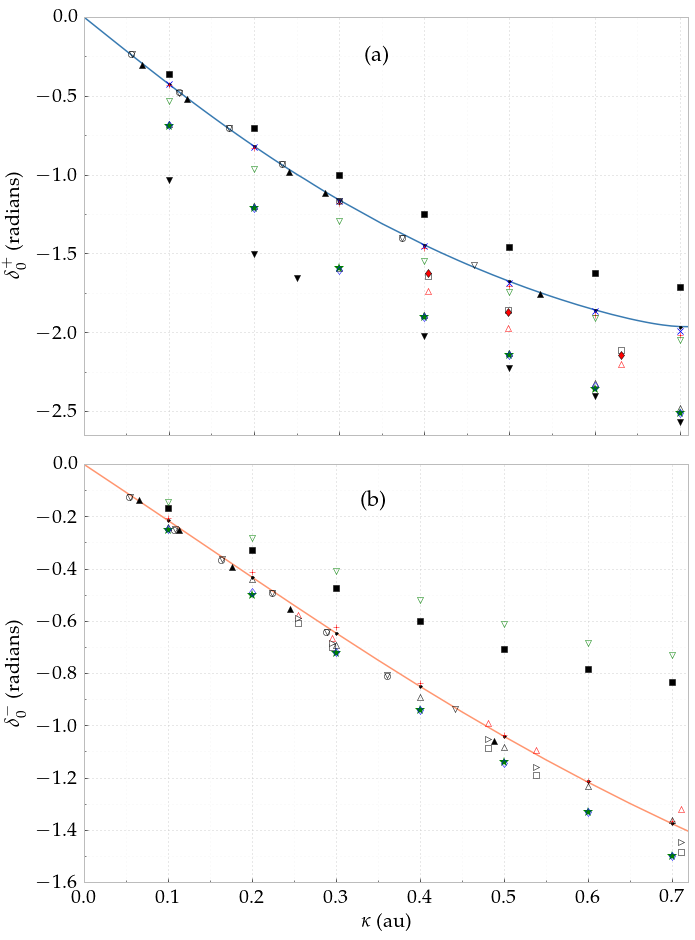

In [41]:
fig = pyplot.figure(figsize=(10, 6.7*2))

###########
# Singlet #
###########
pyplot.subplot(2, 1, 1)

pyplot.plot(df['Kappa'], df['Phase1S'], marker='.', markersize=0.01, color=singletcolor)
#pyplot.plot(Zhang1S2012['kappa'], Zhang1S2012['phase'], 'bx')
pyplot.plot(Walters1S2004['kappa'], Walters1S2004['phase'], 'bx')
pyplot.plot(VanReeth1S2003['kappa'], VanReeth1S2003['phase'], 'k.')
pyplot.plot(Walters1S2004['kappa'], Walters1S2004['phase'], 'bx')
pyplot.plot(Blackwood1S2002['kappa'], Blackwood1S2002['phase'], 'r+')
pyplot.plot(Chiesa1S2002['kappa'], Chiesa1S2002['phase'], 'k^')
pyplot.plot(Ivanov1S2002['kappa'], Ivanov1S2002['phase'], 'kv', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Ivanov1S2001['kappa'], Ivanov1S2001['phase'], 'ko', markerfacecolor='none')
pyplot.plot(Sinha1S2000['kappa'], Sinha1S2000['phase'], '^', markerfacecolor='none', markeredgecolor='r')
pyplot.plot(Adhikari1S1999['kappa'], Adhikari1S1999['phase'], 'ks')
pyplot.plot(Campbell1S1998['kappa'], Campbell1S1998['phase'], 's', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Sinha1S1997['kappa'], Sinha1S1997['phase'], '^', markerfacecolor='none', markeredgecolor='k')
pyplot.plot(Ray1S1997['kappa'], Ray1S1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none')
pyplot.plot(Drachman1S1975['kappa'], Drachman1S1975['phase'], 'rd')
pyplot.plot(Hara1S1975['kappa'], Hara1S1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b')
pyplot.plot(Fraser1S1961['kappa'], Fraser1S1961['phase'], 'kv')
pyplot.plot(Biswas1S2001['kappa'], Biswas1S2001['phase'], 'v', markerfacecolor='none', markeredgecolor='g')
#pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_0^+$ (radians)")

ax = plt.gca()
ax.set_xticklabels([])
ax.text(0.33, -0.28, '(a)', fontsize=22)

pyplot.xlim([0, 0.71])
pyplot.ylim([-2.65, 0])
FixPlot(plt)

###########
# Triplet #
###########
pyplot.subplot(2, 1, 2)

#df.plot(x='Kappa', y='Phase3S', marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(df['Kappa'], df['Phase3S'], marker='.', markersize=0.01, label=r'$^3S$ Complex Kohn', color=tripletcolor)
pyplot.plot(VanReeth3S2003['kappa'], VanReeth3S2003['phase'], 'k.')
pyplot.plot(Blackwood3S2002['kappa'], Blackwood3S2002['phase'], 'r+', label='Blackwood 2002')
pyplot.plot(Chiesa3S2002['kappa'], Chiesa3S2002['phase'], 'k^', label='Chiesa 2002')
pyplot.plot(Ivanov3S2002['kappa'], Ivanov3S2002['phase'], 'kv', markerfacecolor='none', markeredgecolor='k', label='Ivanov 2002')
pyplot.plot(Ivanov3S2001['kappa'], Ivanov3S2001['phase'], 'ko', markerfacecolor='none')
pyplot.plot(Sinha3S2000['kappa'], Sinha3S2000['phase'], '^', markerfacecolor='none', markeredgecolor='r', label='Sinha 2000')
pyplot.plot(Adhikari3S1999['kappa'], Adhikari3S1999['phase'], 'ks', label='Adhikari 1999')
pyplot.plot(Campbell3S1998['kappa'], Campbell3S1998['phase'], 's', markerfacecolor='none', markeredgecolor='k', label='Campbell 1998')
pyplot.plot(Sinha3S1997['kappa'], Sinha3S1997['phase'], '^', markerfacecolor='none', markeredgecolor='k', label='Sinha 1997')
pyplot.plot(Ray3S1997['kappa'], Ray3S1997['phase'], 'g*', markersize=10, markerfacecolor='g', markeredgecolor='none', label='Ray 1997')
#pyplot.plot(Drachman3S1976['kappa'], Drachman3S1976['phase'], 'rd', label='Drachman 1975')
pyplot.plot(Drachman3S1976['kappa'], Drachman3S1976['phase'], 'w>', label='Drachman 1975')
pyplot.plot(Hara3S1975['kappa'], Hara3S1975['phase'], 'd', markerfacecolor='none', markeredgecolor='b', label='Hara 1975')
pyplot.plot(Biswas3S2001['kappa'], Biswas3S2001['phase'], 'v', markerfacecolor='none', markeredgecolor='g')
pyplot.xlabel(r"$\kappa$ (au)")
pyplot.ylabel(r"$\delta_0^-$ (radians)")

ax = plt.gca()
#ax.set_xticklabels([])
ax.text(0.33, -0.16, '(b)', fontsize=22)

pyplot.xlim([0, 0.72])
FixPlot(plt)

plt.tight_layout()
pyplot.savefig('swave-comparisons.pdf', bbox_inches='tight')
pyplot.show()

## Divergence Plot

In [42]:
smat  = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'smatrix')
gen01 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen01')
gen02 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen02')
gen03 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen03')
gen04 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen04')
gen05 = GetPhaseN(cursor, 'data_phase_swavesinglet_w7k01m09a0586b0580g1093_ap_17_984', 'gen05')

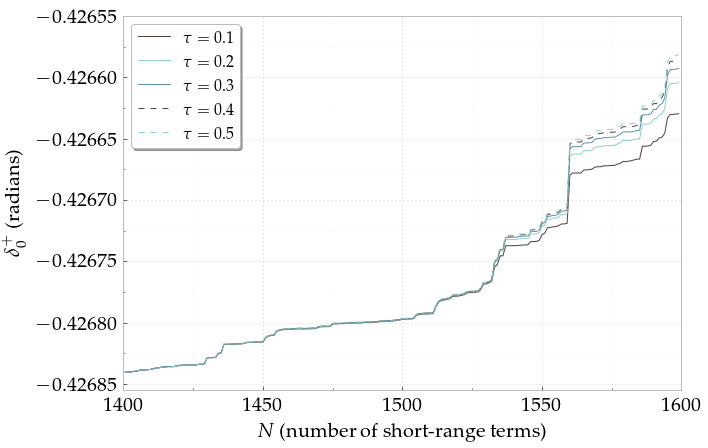

In [43]:
colors = ('#52423A', '#8dd3c7', '#5F91B7')
terms = np.array(range(1400,1600))
#pyplot.plot(terms,  smat[1400:1600], lw=1, label=r'S-matrix')
pyplot.plot(terms, gen01[1400:1600], lw=1, label=r'$\tau = 0.1$', ls='solid', color=colors[0])
pyplot.plot(terms, gen02[1400:1600], lw=1, label=r'$\tau = 0.2$', ls='solid', color=colors[1])
pyplot.plot(terms, gen03[1400:1600], lw=1, label=r'$\tau = 0.3$', ls='solid', color=colors[2])
pyplot.plot(terms, gen04[1400:1600], lw=1, label=r'$\tau = 0.4$', ls='dashed', color=colors[0])
pyplot.plot(terms, gen05[1400:1600], lw=1, label=r'$\tau = 0.5$', ls='dashed', color=colors[1])
pyplot.xlabel(r"$N$ (number of short-range terms)")
pyplot.ylabel(r"$\delta_0^+$ (radians)")
pyplot.xlim([1400, 1600])
pyplot.ylim([-0.426855, -0.42655])
pyplot.legend()
pyplot.gca().get_yaxis().get_major_formatter().set_useOffset(False)
FixPlot(plt)
pyplot.savefig('swave-phase-divergence.pdf', bbox_inches='tight')
pyplot.show()

## Maximum Percentage for $\sigma$

# print "S-wave: ", ((1/4.0*df['Cross1S'].values + 3/4.0*df['Cross3S'].values) / df['Cross'].values * 100).max()
print "P-wave: ", ((1/4.0*df['Cross1P'].values + 3/4.0*df['Cross3P'].values) / df['Cross'].values * 100).max()
print "D-wave: ", ((1/4.0*df['Cross1D'].values + 3/4.0*df['Cross3D'].values) / df['Cross'].values * 100).max()
print "F-wave: ", ((1/4.0*df['Cross1F'].values + 3/4.0*df['Cross3F'].values) / df['Cross'].values * 100).max()
print "G-wave: ", ((1/4.0*df['Cross1G'].values + 3/4.0*df['Cross3G'].values) / df['Cross'].values * 100).max()
print "H-wave: ", ((1/4.0*df['Cross1H'].values + 3/4.0*df['Cross3H'].values) / df['Cross'].values * 100).max()

In [44]:
print "Maximum percent contributions"
print "D-wave singlet: ", ((1/4.0*df['Cross1D'].values) / df['Cross'].values * 100).max()
print "D-wave triplet: ", ((1/4.0*df['Cross3D'].values) / df['Cross'].values * 100).max()
print "F-wave singlet: ", ((1/4.0*df['Cross1F'].values) / df['Cross'].values * 100).max()
print "F-wave triplet: ", ((1/4.0*df['Cross3F'].values) / df['Cross'].values * 100).max()
print "G-wave singlet: ", ((1/4.0*df['Cross1G'].values) / df['Cross'].values * 100).max()
print "G-wave triplet: ", ((1/4.0*df['Cross3G'].values) / df['Cross'].values * 100).max()
print "H-wave singlet: ", ((1/4.0*df['Cross1H'].values) / df['Cross'].values * 100).max()
print "H-wave triplet: ", ((1/4.0*df['Cross3H'].values) / df['Cross'].values * 100).max()
print
print "Average percent contributions"
print "D-wave singlet: ", ((1/4.0*df['Cross1D'].values) / df['Cross'].values * 100).mean()
print "D-wave triplet: ", ((1/4.0*df['Cross3D'].values) / df['Cross'].values * 100).mean()
print "F-wave singlet: ", ((1/4.0*df['Cross1F'].values) / df['Cross'].values * 100).mean()
print "F-wave triplet: ", ((1/4.0*df['Cross3F'].values) / df['Cross'].values * 100).mean()
print "G-wave singlet: ", ((1/4.0*df['Cross1G'].values) / df['Cross'].values * 100).mean()
print "G-wave triplet: ", ((1/4.0*df['Cross3G'].values) / df['Cross'].values * 100).mean()
print "H-wave singlet: ", ((1/4.0*df['Cross1H'].values) / df['Cross'].values * 100).mean()
print "H-wave triplet: ", ((1/4.0*df['Cross3H'].values) / df['Cross'].values * 100).mean()

Maximum percent contributions
D-wave singlet:  41.6068721709
D-wave triplet:  0.400941742786
F-wave singlet:  3.76475029506
F-wave triplet:  0.00606311843033
G-wave singlet:  0.0993817632153
G-wave triplet:  0.00105936328414
H-wave singlet:  0.00621586891732
H-wave triplet:  0.000697503253402

Average percent contributions
D-wave singlet:  8.11776191239
D-wave triplet:  0.127797645053
F-wave singlet:  0.576086739497
F-wave triplet:  0.0011002535004
G-wave singlet:  0.0203101276956
G-wave triplet:  0.000462071411566
H-wave singlet:  0.00127593852231
H-wave triplet:  0.000206185175552


## Maximum Percentages for $\frac{d\sigma}{d\Omega}$

In [45]:
Ntheta = 50
lmax = 5

Zarrays = []
for l in range(lmax+1):
    theta = np.linspace(0, pi, Ntheta)
    x = Esub
    y = theta.copy()
    X, Y = np.meshgrid(x, y)
    zs1 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),l,interp_phase1) for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs3 = np.array([DifferentialCrossSingle(np.sqrt(4.0/27.21138505*x),y,np.sqrt(4.0/27.21138505*(27.21138505/4.0*kappasub**2)),l,interp_phase3) for x,y in zip(np.ravel(X), np.ravel(Y))])
    zs = 0.25*zs1 + 0.75*zs3
    Z = zs.reshape(X.shape)
    #Zarrays.append(Z.ravel())
    Zarrays.append(Z)

In [46]:
print "Maximum percent differences"
print "P-wave: ", PercentDiff(Zarrays[0], Zarrays[1]).max()
print "D-wave: ", PercentDiff(Zarrays[1], Zarrays[2]).max()
print "F-wave: ", PercentDiff(Zarrays[2], Zarrays[3]).max()
print "G-wave: ", PercentDiff(Zarrays[3], Zarrays[4]).max()
print "H-wave: ", PercentDiff(Zarrays[4], Zarrays[5]).max()
print
print "Average percent differences"
print "P-wave: ", PercentDiff(Zarrays[0], Zarrays[1]).mean()
print "D-wave: ", PercentDiff(Zarrays[1], Zarrays[2]).mean()
print "F-wave: ", PercentDiff(Zarrays[2], Zarrays[3]).mean()
print "G-wave: ", PercentDiff(Zarrays[3], Zarrays[4]).mean()
print "H-wave: ", PercentDiff(Zarrays[4], Zarrays[5]).mean()

Maximum percent differences
P-wave:  140.827946273
D-wave:  122.640498224
F-wave:  58.0072181677
G-wave:  12.1109824322
H-wave:  3.78226180857

Average percent differences
P-wave:  49.1327719814
D-wave:  18.4374512176
F-wave:  4.4359609178
G-wave:  0.859013975362
H-wave:  0.254917685924


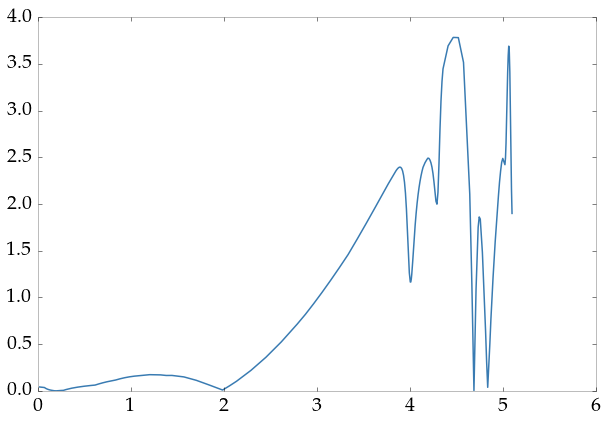

In [47]:
pd = PercentDiff(Zarrays[4], Zarrays[5])
pyplot.plot(Esub, pd[49], label=r'$^1P$', color=singletcolor)
#pyplot.ylim([0, 35])
pyplot.show()

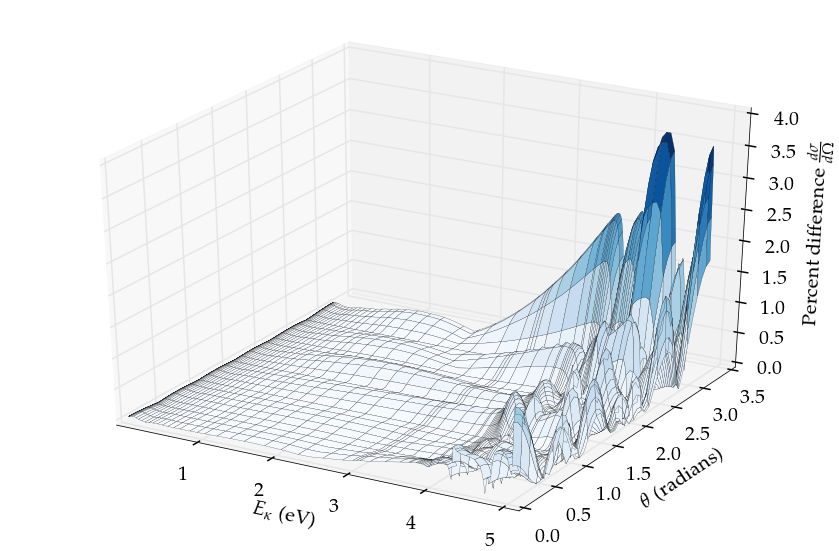

In [48]:
Ntheta = 50
lmax = 5

theta = np.linspace(0, pi, Ntheta)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

x = Esub
y = theta.copy()
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, pd, rstride=2, cstride=2, linewidth=0.2, antialiased=True, cmap=cm.Blues)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$E_\kappa$ (eV)', fontsize=20, labelpad=20)
ax.set_ylabel(r'$\theta$ (radians)', fontsize=20)
ax.set_zlabel(r"Percent difference $\frac{d\sigma}{d\Omega}$", fontsize=20)
ax.set_xlim3d(27.21138505/4.0 * minK**2, 27.21138505/4.0 * maxK**2)
#ax.set_ylim3d(3.2, 0)

plt.tight_layout()
plt.savefig("percent-diff-cross-sections.pdf", bbox_inches='tight')

plt.show()

## ERT P-Wave

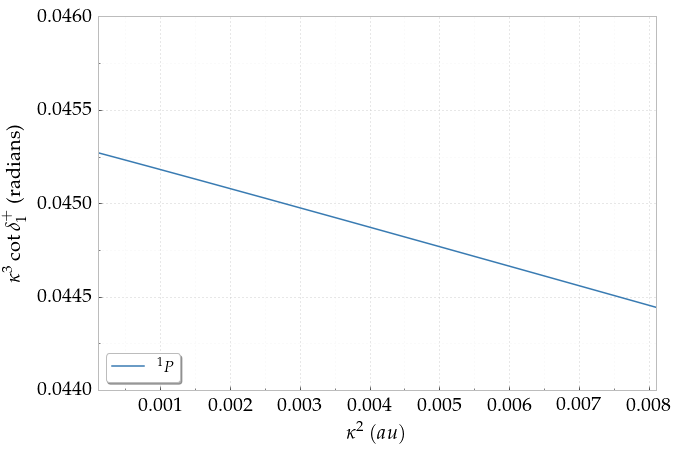

In [49]:
pyplot.plot(kappa1P**2, kappa1P**3 / np.tan(phase1P), label=r'$^1P$', color=singletcolor)
pyplot.xlabel(r"$\kappa^2\: (au)$")
pyplot.ylabel(r"$\kappa^3 \cot\delta_1^+$ (radians)")
pyplot.xlim([0.01**2, 0.09**2])
pyplot.ylim([0.044, 0.046])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("ERT-pwave1.pdf", bbox_inches='tight')
pyplot.show()

In [50]:
x1 = kappa1P[3:5]**2
y1 = kappa1P[3:5]**3 / np.tan(phase1P[3:5])
m1 = (y1[1]-y1[0])/(x1[1]-x1[0])
print -1/(m1*(0-x1[1])+y1[1])

z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
print -1/p1[0]

-22.1010752876
-22.1010752876


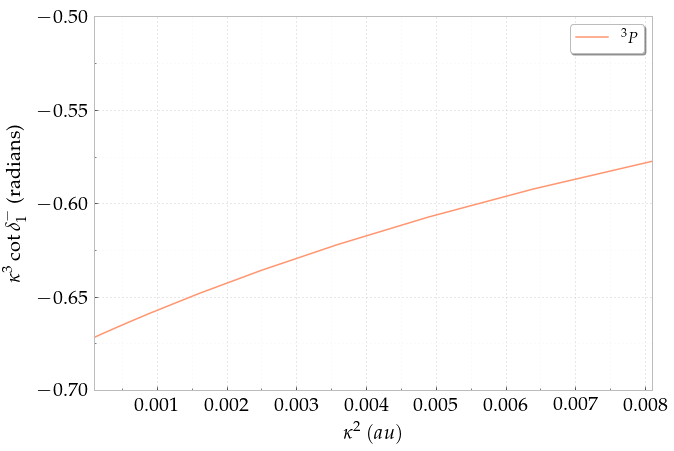

In [51]:
pyplot.plot(kappa3P**2, kappa3P**3 / np.tan(phase3P), label=r'$^3P$', color=tripletcolor)
pyplot.xlabel(r"$\kappa^2\: (au)$")
pyplot.ylabel(r"$\kappa^3 \cot\delta_1^-$ (radians)")
pyplot.xlim([0.01**2, 0.09**2])
pyplot.ylim([-0.7, -0.5])
pyplot.legend()
FixPlot(plt)
pyplot.savefig("ERT-pwave2.pdf", bbox_inches='tight')
pyplot.show()

In [52]:
x3 = kappa3P[3:5]**2
y3 = kappa3P[3:5]**3 / np.tan(phase3P[3:5])
m3 = (y3[1]-y3[0])/(x3[1]-x3[0])
print -1/(m3*(0-x3[1])+y3[1])

z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
print -1/p3[0]

1.47443473536
1.47443473536


## Cleanup

In [53]:
db.close()

In [54]:
print time.asctime( time.localtime(time.time()) )

Wed May 06 18:37:16 2015


In [55]:
df[df.Phase3F < 0.0]['E'].head()

82    3.238835
83    3.333395
84    3.429315
85    3.526596
86    3.625237
Name: E, dtype: float64